# Pandas, NumPy, and Matplotlib (part B)

Pandas, NumPy, and Matplotlib are three wonderful libraries for data analysis with Python. 

- [Pandas](https://pandas.pydata.org/) is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool, built on top of the Python programming language. 

- [NumPy](https://numpy.org/) vastly simplifies manipulating vectors and matrices, and is a fundamental piece of many scientific computing libraries (e.g., sklearn, tensorflow). 

- [Matplotlib](https://matplotlib.org/) is a comprehensive library for creating static, animated, and interactive visualizations in Python.

__Sources:__

[Pandas for Everyone: Python Data Analysis](https://www.oreilly.com/library/view/pandas-for-everyone/9780134547046/)

[pandas.pydata.org](https://pandas.pydata.org)

[pandas: powerful data analysis toolkit - pdf version (+3,000 pages)](https://pandas.pydata.org/pandas-docs/version/1.0.2/pandas.pdf)

[numpy.org](https://numpy.org/)

[matplotlib.org](https://matplotlib.org/stable/index.html)

[Jay Alammar's visual intro to NumPy and Pandas](https://jalammar.github.io/visual-numpy/)


## <font color='blue'>Pandas (continued)</font>

## Data Preprocessing

In [4]:
import pandas as pd
dfSci = pd.read_csv('scientists.csv')

In [5]:
type(dfSci)

pandas.core.frame.DataFrame

In [6]:
dfSci

,Name,Born,Died,Age,Occupation
0,Rosaline Franklin,1920-07-25,1958-04-16,37.0,Chemist
1,William Gosset,1876-06-13,1937-10-16,61.0,Statistician
2,Florence Nightingale,1820-05-12,1910-08-13,90.0,Nurse
3,Marie Curie,1867-11-07,1934-07-04,66.0,Chemist
4,Rachel Carson,1907-05-27,1964-04-14,56.0,Biologist
5,John Snow,1813-03-15,1858-06-16,45.0,Physician
6,Alan Turing,1912-06-23,1954-06-07,NaN,Computer Scientist
7,Johann Gauss,NaN,1855-02-23,77.0,Mathematician


### Missing values

Either `isnull()` or `isna()` would detect missing values of a `DataFrame` or `Series`.

If used on a dataframe, it produces the same shape dataframe whose a cell is `True` when there is a missing value. 

In [7]:
dfSci.isnull()

,Name,Born,Died,Age,Occupation
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
5,False,False,False,False,False
6,False,False,False,True,False
7,False,True,False,False,False


In [8]:
dfSci.isna()

,Name,Born,Died,Age,Occupation
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
5,False,False,False,False,False
6,False,False,False,True,False
7,False,True,False,False,False


Sometimes, the data might be too large. You may want to find the columns with missing values.

__Question:__ Can you find number of missing values in each column of `scientists` dataframe?

In [9]:
dfSci.isnull().sum()

Name          0
Born          1
Died          0
Age           1
Occupation    0
dtype: int64

### Updating a value in a dataframe

In [12]:
dfSci.loc[7, 'Born'] = '1777-04-30'

In [13]:
dfSci.loc[7, 'Born']

'1777-04-30'

### Dropping NaN

If you want to retain the complete cases (i.e. observations/rows), you can use `dropna()` method.

In [14]:
dfSci.dropna()
## this will return the value of the dataframe without the missing value, however it returns a new value of the dataframe
## without changing the original dataFrame.

,Name,Born,Died,Age,Occupation
0,Rosaline Franklin,1920-07-25,1958-04-16,37.0,Chemist
1,William Gosset,1876-06-13,1937-10-16,61.0,Statistician
2,Florence Nightingale,1820-05-12,1910-08-13,90.0,Nurse
3,Marie Curie,1867-11-07,1934-07-04,66.0,Chemist
4,Rachel Carson,1907-05-27,1964-04-14,56.0,Biologist
5,John Snow,1813-03-15,1858-06-16,45.0,Physician
7,Johann Gauss,1777-04-30,1855-02-23,77.0,Mathematician


`df.dropna()` will not update (or make changes to) the `df` by default. If you want to update the original dataframe:

- reassigned it to the original `df`
- set `inplace = True` so that the changes will be __in place__

In [17]:
dfSci.dropna(inplace = True)

In [18]:
dfSci = dfSci.dropna()

In [19]:
dfSci

,Name,Born,Died,Age,Occupation
0,Rosaline Franklin,1920-07-25,1958-04-16,37.0,Chemist
1,William Gosset,1876-06-13,1937-10-16,61.0,Statistician
2,Florence Nightingale,1820-05-12,1910-08-13,90.0,Nurse
3,Marie Curie,1867-11-07,1934-07-04,66.0,Chemist
4,Rachel Carson,1907-05-27,1964-04-14,56.0,Biologist
5,John Snow,1813-03-15,1858-06-16,45.0,Physician
7,Johann Gauss,1777-04-30,1855-02-23,77.0,Mathematician


In [20]:
dfSci['Age'].mean()

61.714285714285715

### Descriptive statistics

What is the average/maximum/minimum/median/... value of age in this data?

In [21]:
dfSci['Age'].max()

90.0

In [22]:
dfSci['Age'].min()

37.0

In [23]:
dfSci['Age'].median()

61.0

In [24]:
dfSci['Age'].describe()

count     7.000000
mean     61.714286
std      18.144919
min      37.000000
25%      50.500000
50%      61.000000
75%      71.500000
max      90.000000
Name: Age, dtype: float64

### Boolean subsetting

Often times, we subset based on a condition, instead of indexes. This is generally referred to as __"filtering"__.

__Question__: Find out those scientists whose age is greater than the average age of the scientists

In [25]:
dfSci[dfSci['Age'] > dfSci['Age'].mean()]

,Name,Born,Died,Age,Occupation
2,Florence Nightingale,1820-05-12,1910-08-13,90.0,Nurse
3,Marie Curie,1867-11-07,1934-07-04,66.0,Chemist
7,Johann Gauss,1777-04-30,1855-02-23,77.0,Mathematician


__Question__: Find out those scientists whose age is greater than the average age of the scientists but less than 80

In [30]:
dfSci[(dfSci['Age'] > dfSci['Age'].mean()) & (dfSci['Age'] < 80)]

,Name,Born,Died,Age,Occupation
3,Marie Curie,1867-11-07,1934-07-04,66.0,Chemist
7,Johann Gauss,1777-04-30,1855-02-23,77.0,Mathematician


__Question__: Find out those scientists whose age is greater than the average age of the scientists or less than 40

In [37]:
dfSci[(dfSci['Age'] > dfSci['Age'].mean()) | (dfSci['Age'] < (dfSci['Age'].median()))]

,Name,Born,Died,Age,Occupation
0,Rosaline Franklin,1920-07-25,1958-04-16,37.0,Chemist
2,Florence Nightingale,1820-05-12,1910-08-13,90.0,Nurse
3,Marie Curie,1867-11-07,1934-07-04,66.0,Chemist
4,Rachel Carson,1907-05-27,1964-04-14,56.0,Biologist
5,John Snow,1813-03-15,1858-06-16,45.0,Physician
7,Johann Gauss,1777-04-30,1855-02-23,77.0,Mathematician


__Notes:__

- each condition should be given in parentheses
- use `&` instead of `and`
- use `|` instead of `or`

### Creating a new column

In [38]:
dfSci

,Name,Born,Died,Age,Occupation
0,Rosaline Franklin,1920-07-25,1958-04-16,37.0,Chemist
1,William Gosset,1876-06-13,1937-10-16,61.0,Statistician
2,Florence Nightingale,1820-05-12,1910-08-13,90.0,Nurse
3,Marie Curie,1867-11-07,1934-07-04,66.0,Chemist
4,Rachel Carson,1907-05-27,1964-04-14,56.0,Biologist
5,John Snow,1813-03-15,1858-06-16,45.0,Physician
7,Johann Gauss,1777-04-30,1855-02-23,77.0,Mathematician


In [39]:
dfSci['Age_next_year'] = dfSci['Age']+1

## creating a new column by adding 1 to the original dfSci['Age'] column.

In [40]:
dfSci

,Name,Born,Died,Age,Occupation,Age_next_year
0,Rosaline Franklin,1920-07-25,1958-04-16,37.0,Chemist,38.0
1,William Gosset,1876-06-13,1937-10-16,61.0,Statistician,62.0
2,Florence Nightingale,1820-05-12,1910-08-13,90.0,Nurse,91.0
3,Marie Curie,1867-11-07,1934-07-04,66.0,Chemist,67.0
4,Rachel Carson,1907-05-27,1964-04-14,56.0,Biologist,57.0
5,John Snow,1813-03-15,1858-06-16,45.0,Physician,46.0
7,Johann Gauss,1777-04-30,1855-02-23,77.0,Mathematician,78.0


In [42]:
dfSci.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7 entries, 0 to 7
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Name           7 non-null      object 
 1   Born           7 non-null      object 
 2   Died           7 non-null      object 
 3   Age            7 non-null      float64
 4   Occupation     7 non-null      object 
 5   Age_next_year  7 non-null      float64
dtypes: float64(2), object(4)
memory usage: 392.0+ bytes


In [43]:
dfSci['Age_int'] = dfSci['Age'].astype('int')

In [45]:
dfSci
dfSci.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7 entries, 0 to 7
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Name           7 non-null      object 
 1   Born           7 non-null      object 
 2   Died           7 non-null      object 
 3   Age            7 non-null      float64
 4   Occupation     7 non-null      object 
 5   Age_next_year  7 non-null      float64
 6   Age_int        7 non-null      int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 448.0+ bytes


### Dropping columns or rows

| What to drop | syntax |
|--------------|--------|
|rows|`<df>.drop([list of index labels], axis = 0)`|
| columns |`<df>.drop([list of column names], axis = 1)`|


In [48]:
dfSci.drop(['Age', 'Age_next_year'], axis = 1)
## drop returns a new dataframe by dropping the column.
## without damaging the data structure of the original file.
## axis 0 for row, 1 for column.

,Name,Born,Died,Occupation,Age_int
0,Rosaline Franklin,1920-07-25,1958-04-16,Chemist,37
1,William Gosset,1876-06-13,1937-10-16,Statistician,61
2,Florence Nightingale,1820-05-12,1910-08-13,Nurse,90
3,Marie Curie,1867-11-07,1934-07-04,Chemist,66
4,Rachel Carson,1907-05-27,1964-04-14,Biologist,56
5,John Snow,1813-03-15,1858-06-16,Physician,45
7,Johann Gauss,1777-04-30,1855-02-23,Mathematician,77


In [49]:
dfSci = dfSci.drop(['Age', 'Age_next_year'], axis = 1)

In [50]:
dfSci

,Name,Born,Died,Occupation,Age_int
0,Rosaline Franklin,1920-07-25,1958-04-16,Chemist,37
1,William Gosset,1876-06-13,1937-10-16,Statistician,61
2,Florence Nightingale,1820-05-12,1910-08-13,Nurse,90
3,Marie Curie,1867-11-07,1934-07-04,Chemist,66
4,Rachel Carson,1907-05-27,1964-04-14,Biologist,56
5,John Snow,1813-03-15,1858-06-16,Physician,45
7,Johann Gauss,1777-04-30,1855-02-23,Mathematician,77


In [52]:
dfSci.to_csv('new_203.csv', index=False)

Note that `index = False` makes the index labels not to be written to the file.

## <font color='blue'>NumPy</font>
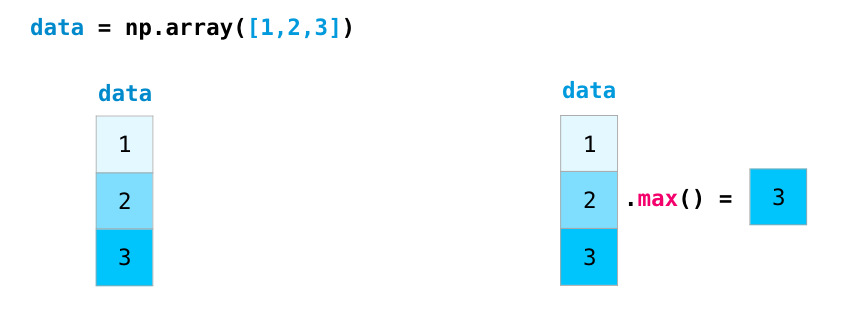

In [54]:
import numpy as np

### Creating arrays

   * Construct an "identity matrix" `I`, a "zero matrix" `O` and an "all-ones" matrix `X` and an "all-3s" matrix `Y` in numpy, of size 10x10.
   * The tedious approach would be to constuct each matrix explicitly. Instead, construct them via calls to numpy functions and matrix operations in 4 lines of code.
   * Print all 4 matrices.

In [63]:
I = np.array([[1,0,0], [0,1,0], [0,0,1]])
O = np.ones((10, 10)) * 5
O

array([[5., 5., 5., 5., 5., 5., 5., 5., 5., 5.],
       [5., 5., 5., 5., 5., 5., 5., 5., 5., 5.],
       [5., 5., 5., 5., 5., 5., 5., 5., 5., 5.],
       [5., 5., 5., 5., 5., 5., 5., 5., 5., 5.],
       [5., 5., 5., 5., 5., 5., 5., 5., 5., 5.],
       [5., 5., 5., 5., 5., 5., 5., 5., 5., 5.],
       [5., 5., 5., 5., 5., 5., 5., 5., 5., 5.],
       [5., 5., 5., 5., 5., 5., 5., 5., 5., 5.],
       [5., 5., 5., 5., 5., 5., 5., 5., 5., 5.],
       [5., 5., 5., 5., 5., 5., 5., 5., 5., 5.]])

In [57]:
type(I)

numpy.ndarray

### Array arithmetic
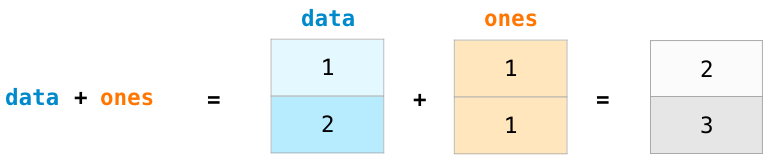

In [66]:
data = np.array([1, 2])
ones = np.array([1, 1])

In [67]:
[1, 2] + [1, 1]

[1, 2, 1, 1]

In [68]:
data + ones 

array([2, 3])

#### data + ones

#### data * ones

In [69]:
data * ones

array([1, 2])

#### data - ones

In [70]:
data - ones

array([0, 1])

#### data / ones

In [71]:
data / ones 

array([1., 2.])

#### dot product

In [72]:
data.dot(ones)

3

### Matrix indexing and aggregation

In [73]:
data = np.array([[1,2],[3,4],[5,6]])
data

array([[1, 2],
       [3, 4],
       [5, 6]])

__Selecting the first row:__

In [74]:
data[0]

array([1, 2])

__Selecting the second number in the first row:__

In [75]:
data[0][1]

2

__Selecting the first column:__

In [76]:
data[:, 0]

array([1, 3, 5])

In [77]:
data[:, 1]

array([2, 4, 6])

__The largest and the smallest number in the matrix:__

In [78]:
data.max()

6

In [79]:
data.min()

1

### Data representation

A colored image is represented by a 3D matrix. Each pixel is represneted by 3 numbers (RGB values: red, green, blue).

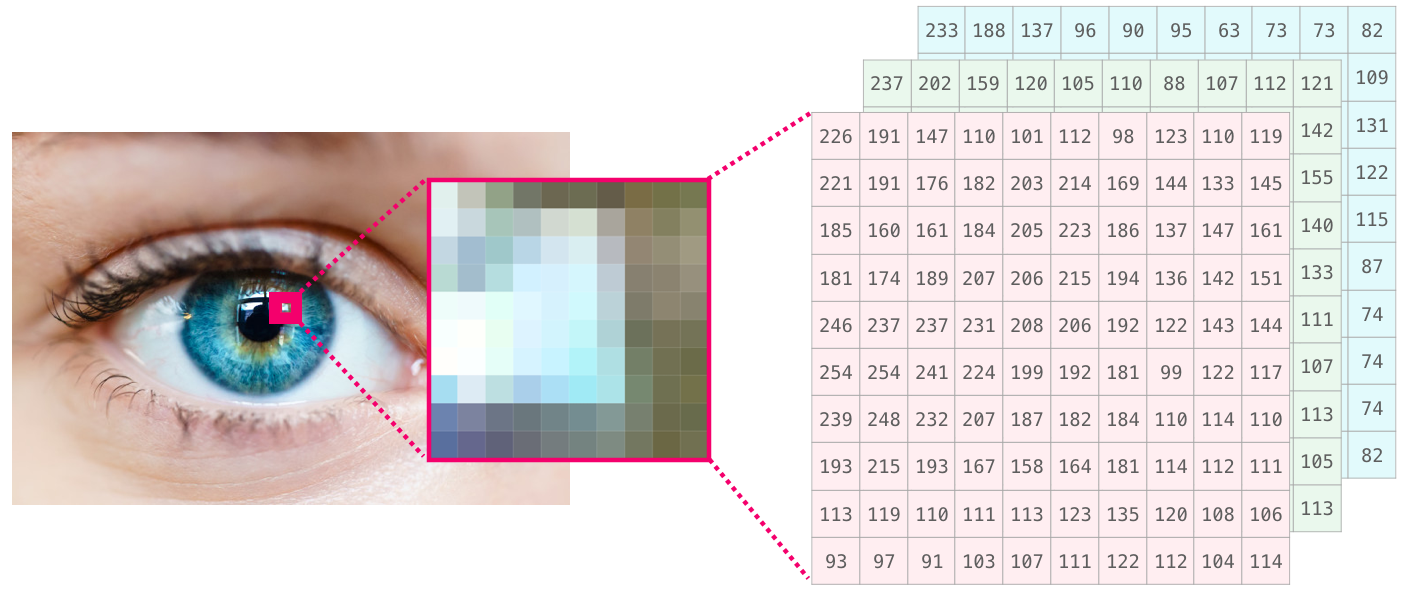

## <font color='blue'>Matplotlib</font>

In [81]:
import matplotlib.pyplot as plt

### Line plot

In [82]:
x = np.arange(10)
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [90]:
y = x
z = 2*x
m = x**2

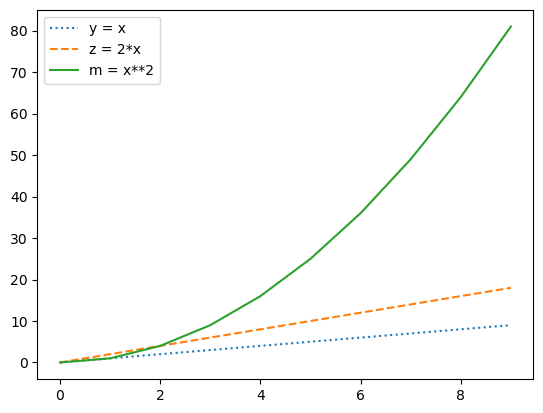

In [104]:
plt.plot(x, y, label='y = x', linestyle = 'dotted')
plt.plot(x, z, label='z = 2*x', linestyle = 'dashed')
plt.plot(x, m, label='m = x**2')
plt.legend()
plt.show()

### Scatter plot

In [109]:
x = np.random.normal(size = 1000)
y = 2*x + np.random.normal(size = 1000)

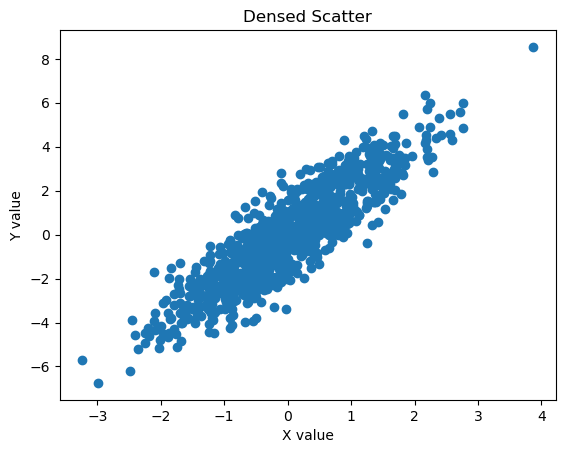

In [113]:
plt.scatter(x, y)
plt.title('Densed Scatter')
plt.xlabel('X value')
plt.ylabel('Y value')
plt.show()

### Histograms

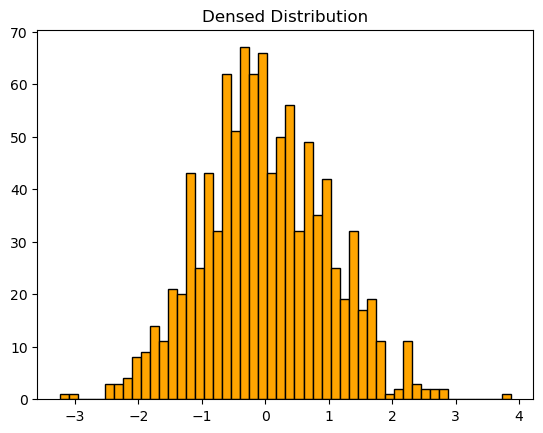

In [117]:
plt.hist(x, bins = 50, color = 'orange', edgecolor='black')
plt.title('Densed Distribution')
plt.show()

### Bar charts

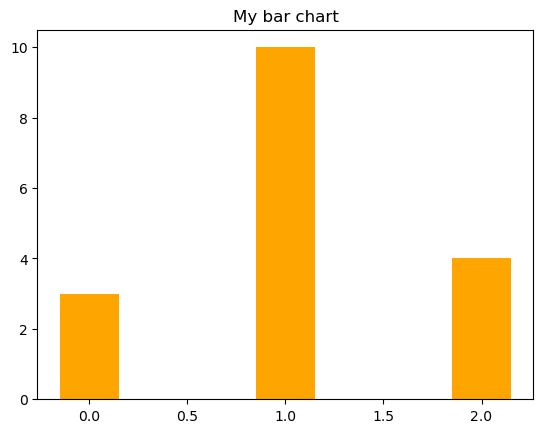

In [119]:
y = [3, 10, 4]
x = range(len(y))
plt.bar(x, y, width=0.3, color='orange')
plt.title('My bar chart')
plt.show()

### Just for fun: [XKCD](https://xkcd.com/688/)-style sketch plots

In [ ]:
with plt.xkcd():
    # Based on "Stove Ownership" from XKCD by Randall Monroe
    # http://xkcd.com/418/

    fig = plt.figure()
    ax = fig.add_axes((0.1, 0.2, 0.8, 0.7))
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    plt.xticks([])
    plt.yticks([])
    ax.set_ylim([-30, 10])

    data = np.ones(100)
    data[70:] -= np.arange(30)

    plt.annotate(
        'THE DAY I REALIZED\nI COULD COOK BACON\nWHENEVER I WANTED',
        xy=(70, 1), arrowprops=dict(arrowstyle='->'), xytext=(15, -10))

    plt.plot(data)

    plt.xlabel('time')
    plt.ylabel('my overall health')
    fig.text(
        0.5, 0.05,
        '"Stove Ownership" from xkcd by Randall Monroe',
        ha='center')

## <font color='blue'>Exercise</font>

Read the gapminder data again: `gapminder.tsv`

In [120]:
df = pd.read_csv('gapminder.tsv', sep='\t')

Show descriptive statistics for this data

In [122]:
df.describe()

,year,lifeExp,pop,gdpPercap
count,1704.00000,1704.000000,1.704000e+03,1704.000000
mean,1979.50000,59.474439,2.960121e+07,7215.327081
std,17.26533,12.917107,1.061579e+08,9857.454543
min,1952.00000,23.599000,6.001100e+04,241.165876
25%,1965.75000,48.198000,2.793664e+06,1202.060309
50%,1979.50000,60.712500,7.023596e+06,3531.846988
75%,1993.25000,70.845500,1.958522e+07,9325.462346
max,2007.00000,82.603000,1.318683e+09,113523.132900


In [136]:
df1 = df[df['country']=='Canada']
df1
df2 = df[df['country']=='United States']
df2

,country,continent,year,lifeExp,pop,gdpPercap
1608,United States,Americas,1952,68.440,157553000,13990.48208
1609,United States,Americas,1957,69.490,171984000,14847.12712
1610,United States,Americas,1962,70.210,186538000,16173.14586
1611,United States,Americas,1967,70.760,198712000,19530.36557
1612,United States,Americas,1972,71.340,209896000,21806.03594
1613,United States,Americas,1977,73.380,220239000,24072.63213
1614,United States,Americas,1982,74.650,232187835,25009.55914
1615,United States,Americas,1987,75.020,242803533,29884.35041
1616,United States,Americas,1992,76.090,256894189,32003.93224
1617,United States,Americas,1997,76.810,272911760,35767.43303


`df1`: Subset the data and only keep records for Canada

`df2`: Subset the data and only keep records for United States

Make some line plots to compare the time trend of `lifeExp` and `gdpPercap` for these two countries

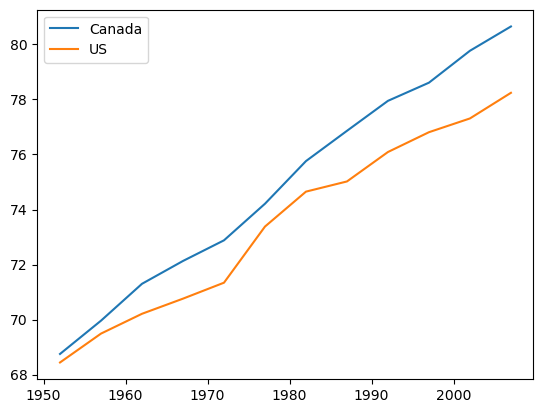

In [140]:
plt.plot(df1['year'], df1['lifeExp'], label='Canada')
plt.plot(df2['year'], df2['lifeExp'], label='US')
plt.legend()
plt.show()

`df3`: Subset the data and only keep records for 2007

In [142]:
df3 = df[df['year']==2007]
df3

,country,continent,year,lifeExp,pop,gdpPercap
11,Afghanistan,Asia,2007,43.828,31889923,974.580338
23,Albania,Europe,2007,76.423,3600523,5937.029526
35,Algeria,Africa,2007,72.301,33333216,6223.367465
47,Angola,Africa,2007,42.731,12420476,4797.231267
59,Argentina,Americas,2007,75.320,40301927,12779.379640
...,...,...,...,...,...,...
1655,Vietnam,Asia,2007,74.249,85262356,2441.576404
1667,West Bank and Gaza,Asia,2007,73.422,4018332,3025.349798
1679,"Yemen, Rep.",Asia,2007,62.698,22211743,2280.769906
1691,Zambia,Africa,2007,42.384,11746035,1271.211593


Make some histograms to show the distribution of `lifeExp` and `gdpPercap` in 2007

(array([66., 22., 16.,  5.,  5.,  7.,  9.,  6.,  3.,  3.]),
 array([  277.5518587 ,  5185.51568983, 10093.47952096, 15001.44335209,
        19909.40718322, 24817.37101435, 29725.33484548, 34633.29867661,
        39541.26250774, 44449.22633887, 49357.19017   ]),
 <BarContainer object of 10 artists>)

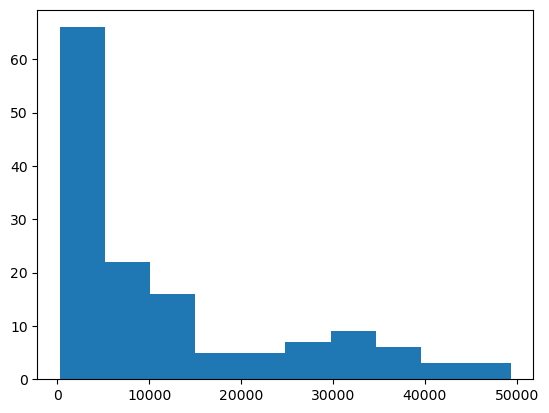

In [144]:
plt.hist(df3['gdpPercap'])